# Domácí úkol
## Část 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

**Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže pomocí `%timeit` a různých výsledných velikostí matic (např. 101, 1001, 10001).**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_col += 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [3]:
A = integer_spiral(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


In [4]:
def integer_spiral_numpy(n):
    # TODO naimplementujte viz zadání
    A = np.zeros((n + 2, n + 2))

    mid_row = n // 2 + 1  # počáteční pozice: střed matice
    mid_col = n // 2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[mid_row, mid_col] = i  # vložíme číslo do středu matice
    i += 1
    n_circles = n // 2

    for circle in range(n_circles):
        # délka strany čtverce pro vyplnění
        side_len = (circle + 1) * 2

        # pozice jednotlivých stran čtverce
        col_right = mid_col + circle + 1
        col_left = mid_col - circle - 1
        row_down = mid_row + circle + 1
        row_up = mid_row - circle - 1

        # pravá strana
        A[(row_down - 1):(row_up - 1):-1, col_right] = np.arange(i, i + side_len)
        i += side_len

        # horní strana
        A[row_up, (col_right - 1):(col_left - 1):-1] = np.arange(i, i + side_len)
        i += side_len

        # levá strana
        A[(row_up + 1):(row_down + 1), col_left] = np.arange(i, i + side_len)
        i += side_len

        # dolní strana
        A[row_down, (col_left + 1):(col_right + 1)] = np.arange(i, i + side_len)
        i += side_len

    return A[1:-1, 1:-1]  # ořízneme nulový okraj

In [5]:
A = integer_spiral_numpy(7)
print(A)

[[37. 36. 35. 34. 33. 32. 31.]
 [38. 17. 16. 15. 14. 13. 30.]
 [39. 18.  5.  4.  3. 12. 29.]
 [40. 19.  6.  1.  2. 11. 28.]
 [41. 20.  7.  8.  9. 10. 27.]
 [42. 21. 22. 23. 24. 25. 26.]
 [43. 44. 45. 46. 47. 48. 49.]]


174 µs ± 41.3 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)
The slowest run took 15.82 times longer than the fastest. This could mean that an intermediate result is being cached.
45.9 µs ± 20.6 µs per loop (mean ± std. dev. of 1000 runs, 1 loop each)
1.2 ms ± 265 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)
The slowest run took 8.82 times longer than the fastest. This could mean that an intermediate result is being cached.
108 µs ± 28.3 µs per loop (mean ± std. dev. of 1000 runs, 1 loop each)
11.1 ms ± 467 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)
The slowest run took 4.39 times longer than the fastest. This could mean that an intermediate result is being cached.
347 µs ± 50.1 µs per loop (mean ± std. dev. of 1000 runs, 1 loop each)
75.5 ms ± 27.4 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
549 µs ± 27.5 µs per loop (mean ± std. dev. of 1000 runs, 1 loop each)
441 ms ± 9.83 ms per loop (mean ± std. dev. of 10 runs, 1 loop each)
3 ms ± 175 µs p

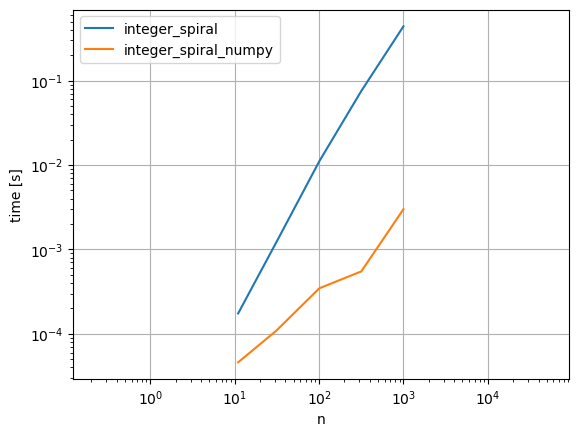

In [6]:
# TODO otestujte rychlost obou implementací

n = np.logspace(1, 3, 5, base=10, dtype=int) //2 * 2 + 1

times = np.zeros((2, len(n)))

for i, n_ in enumerate(n):
    tmp = %timeit -o  -n 1 -r 10 integer_spiral(n_)
    times[0, i] = tmp.average
    tmp = %timeit -o -n 1 -r 1000 integer_spiral_numpy(n_)
    times[1, i] = tmp.average

plt.plot(n, times[0], label='integer_spiral')   
plt.plot(n, times[1], label='integer_spiral_numpy')
plt.legend()
plt.xlabel('n')
plt.ylabel('time [s]')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.axis('equal')
plt.show()

## Část 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
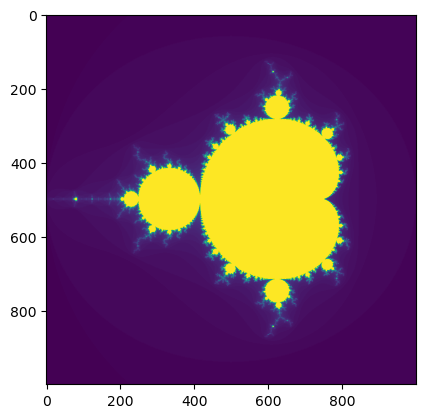

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, při kolikáté iteraci $k$ je se stalo, že $|z_i| > 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [7]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    # TODO naimplementujte viz zadání
    x_axis = np.linspace(x_min, x_max, n)
    y_axis = np.linspace(y_min, y_max, n)
    X, Y = np.meshgrid(x_axis, y_axis)
    C = X + 1j * Y
    Z = np.zeros_like(C, dtype=np.complex128)
    divergence_matrix = np.zeros_like(C, dtype=float)
    
    for i in range(k):
        Z = Z**2 + C
        divergence_matrix = divergence_matrix + (np.abs(Z) < 2)

    return divergence_matrix

/tmp/ipykernel_3697763/3697584370.py:11: RuntimeWarning: overflow encountered in square
  Z = Z**2 + C
/tmp/ipykernel_3697763/3697584370.py:11: RuntimeWarning: invalid value encountered in square
  Z = Z**2 + C


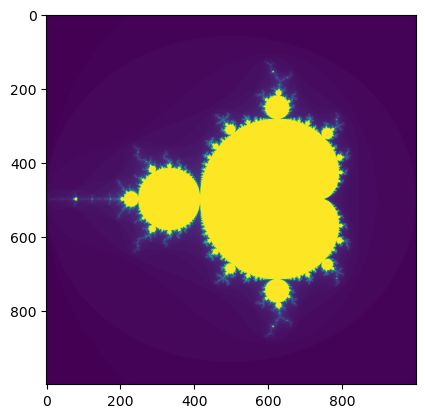

In [8]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
1. Vykreslete také Juliovu množinu (viz. https://en.wikipedia.org/wiki/Julia_set)
2. Použijte váš kód pro číselnou spirálu a vytvořte obrázek prvočíselné spirály (viz. https://en.wikipedia.org/wiki/Ulam_spiral). Stačí vytvořit matici kde 

In [9]:
def julia_set(c, x_min=-2, x_max=2, y_min=-1.5, y_max=1.5, n=1000, k=100):
    x_axis = np.linspace(x_min, x_max, n)
    y_axis = np.linspace(y_min, y_max, n)
    X, Y = np.meshgrid(x_axis, y_axis)
    Z = X + 1j * Y
    divergence_matrix = np.zeros_like(Z, dtype=float)

    for i in range(k):
        Z = Z**2 + c
        mask = np.abs(Z) < 2
        divergence_matrix += mask

    return divergence_matrix

/tmp/ipykernel_3697763/943466751.py:9: RuntimeWarning: overflow encountered in square
  Z = Z**2 + c
/tmp/ipykernel_3697763/943466751.py:9: RuntimeWarning: invalid value encountered in square
  Z = Z**2 + c


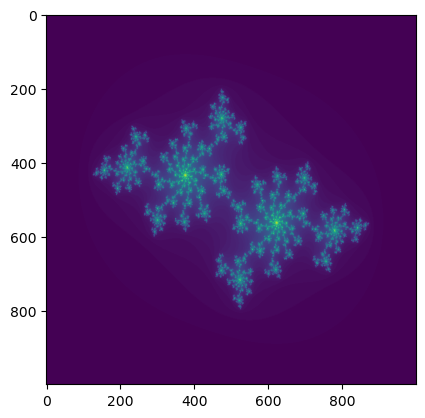

In [10]:
n = 1000
k = 100
c = -0.70176 - 0.3842j
divergence_matrix = julia_set(c, n=n, k=k)
plt.imshow(divergence_matrix)

In [11]:
import numpy as np
import numba as nb

@nb.jit(nopython=True, parallel=True, fastmath=True)
def julia_set_nb(c, x_min=-2, x_max=2, y_min=-1.5, y_max=1.5, n=1000, k=100):
    x_axis = np.linspace(x_min, x_max, n)
    y_axis = np.linspace(y_min, y_max, n)
            
    divergence_matrix = np.zeros((n, n), dtype=float)

    for idx_x in nb.prange(n):
        for idx_y in nb.prange(n):
            Z = x_axis[idx_x] + 1j * y_axis[idx_y]
            for i in range(k):
                Z = Z**2 + c
                if abs(Z) > 2:
                    divergence_matrix[idx_y, idx_x] = i
                    break

    return divergence_matrix


In [12]:
%%timeit
divergence_matrix = julia_set(c, n=n, k=k)

/tmp/ipykernel_3697763/943466751.py:9: RuntimeWarning: overflow encountered in square
  Z = Z**2 + c
/tmp/ipykernel_3697763/943466751.py:9: RuntimeWarning: invalid value encountered in square
  Z = Z**2 + c


344 ms ± 4.24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%%timeit
divergence_matrix = julia_set_nb(c, n=n, k=k)

6.8 ms ± 409 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
import matplotlib.pyplot as plt
from ipywidgets import interactive

def plot_julia(c_real=0.285, c_imag=0.01):
    divergence_matrix = julia_set_nb(complex(c_real, c_imag))
    plt.imshow(divergence_matrix, extent=(-2, 2, -1.5, 1.5), cmap='inferno')


interactive_plot = interactive(plot_julia, c_real=(-2.0, 2.0, 0.001), c_imag=(-2.0, 2.0, 0.001))
interactive_plot

interactive(children=(FloatSlider(value=0.285, description='c_real', max=2.0, min=-2.0, step=0.001), FloatSlid…

In [15]:
def eratosthenes_sieve(n):
    sieve = np.arange(1, n + 1)
    sieve[0] = 0
    for i in range(2, int(np.sqrt(n)) + 1):
        if sieve[i - 1] != 0:
            sieve[i**2 - 1:n:i] = 0
    return sieve


def integer_spiral_numpy(n):
    cisla_na_doplneni = eratosthenes_sieve(n**2)  # NEWLINE
    
    A = np.zeros((n + 2, n + 2))
    mid_row = n // 2 + 1
    mid_col = n // 2 + 1
    
    i = 0   # NEWLINE
    A[mid_row, mid_col] = cisla_na_doplneni[i]  # NEWLINE
    
    i += 1
    n_circles = n // 2

    for circle in range(n_circles):

        side_len = (circle + 1) * 2

        # pozice jednotlivých stran čtverce
        col_right = mid_col + circle + 1
        col_left = mid_col - circle - 1
        row_down = mid_row + circle + 1
        row_up = mid_row - circle - 1

        # pravá strana
        A[(row_down - 1):(row_up - 1):-1, col_right] = cisla_na_doplneni[i:(i + side_len)]  # NEWLINE
        i += side_len

        # horní strana
        A[row_up, (col_right - 1):(col_left - 1):-1] = cisla_na_doplneni[i:(i + side_len)]  # NEWLINE
        i += side_len

        # levá strana
        A[(row_up + 1):(row_down + 1), col_left] = cisla_na_doplneni[i:(i + side_len)]  # NEWLINE
        i += side_len

        # dolní strana
        A[row_down, (col_left + 1):(col_right + 1)] = cisla_na_doplneni[i:(i + side_len)]  # NEWLINE
        i += side_len

    return A[1:-1, 1:-1]  # ořízneme nulový okraj

In [16]:
print(integer_spiral_numpy(7))


[[37.  0.  0.  0.  0.  0. 31.]
 [ 0. 17.  0.  0.  0. 13.  0.]
 [ 0.  0.  5.  0.  3.  0. 29.]
 [ 0. 19.  0.  0.  2. 11.  0.]
 [41.  0.  7.  0.  0.  0.  0.]
 [ 0.  0.  0. 23.  0.  0.  0.]
 [43.  0.  0.  0. 47.  0.  0.]]


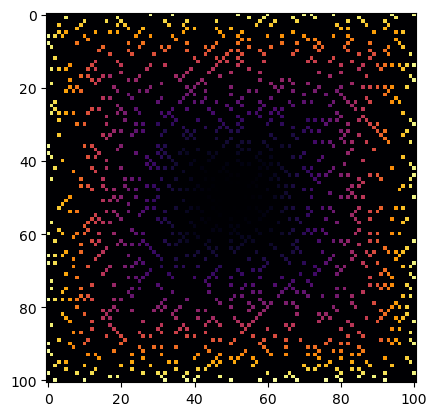

In [17]:
plt.imshow(integer_spiral_numpy(101), cmap='inferno')

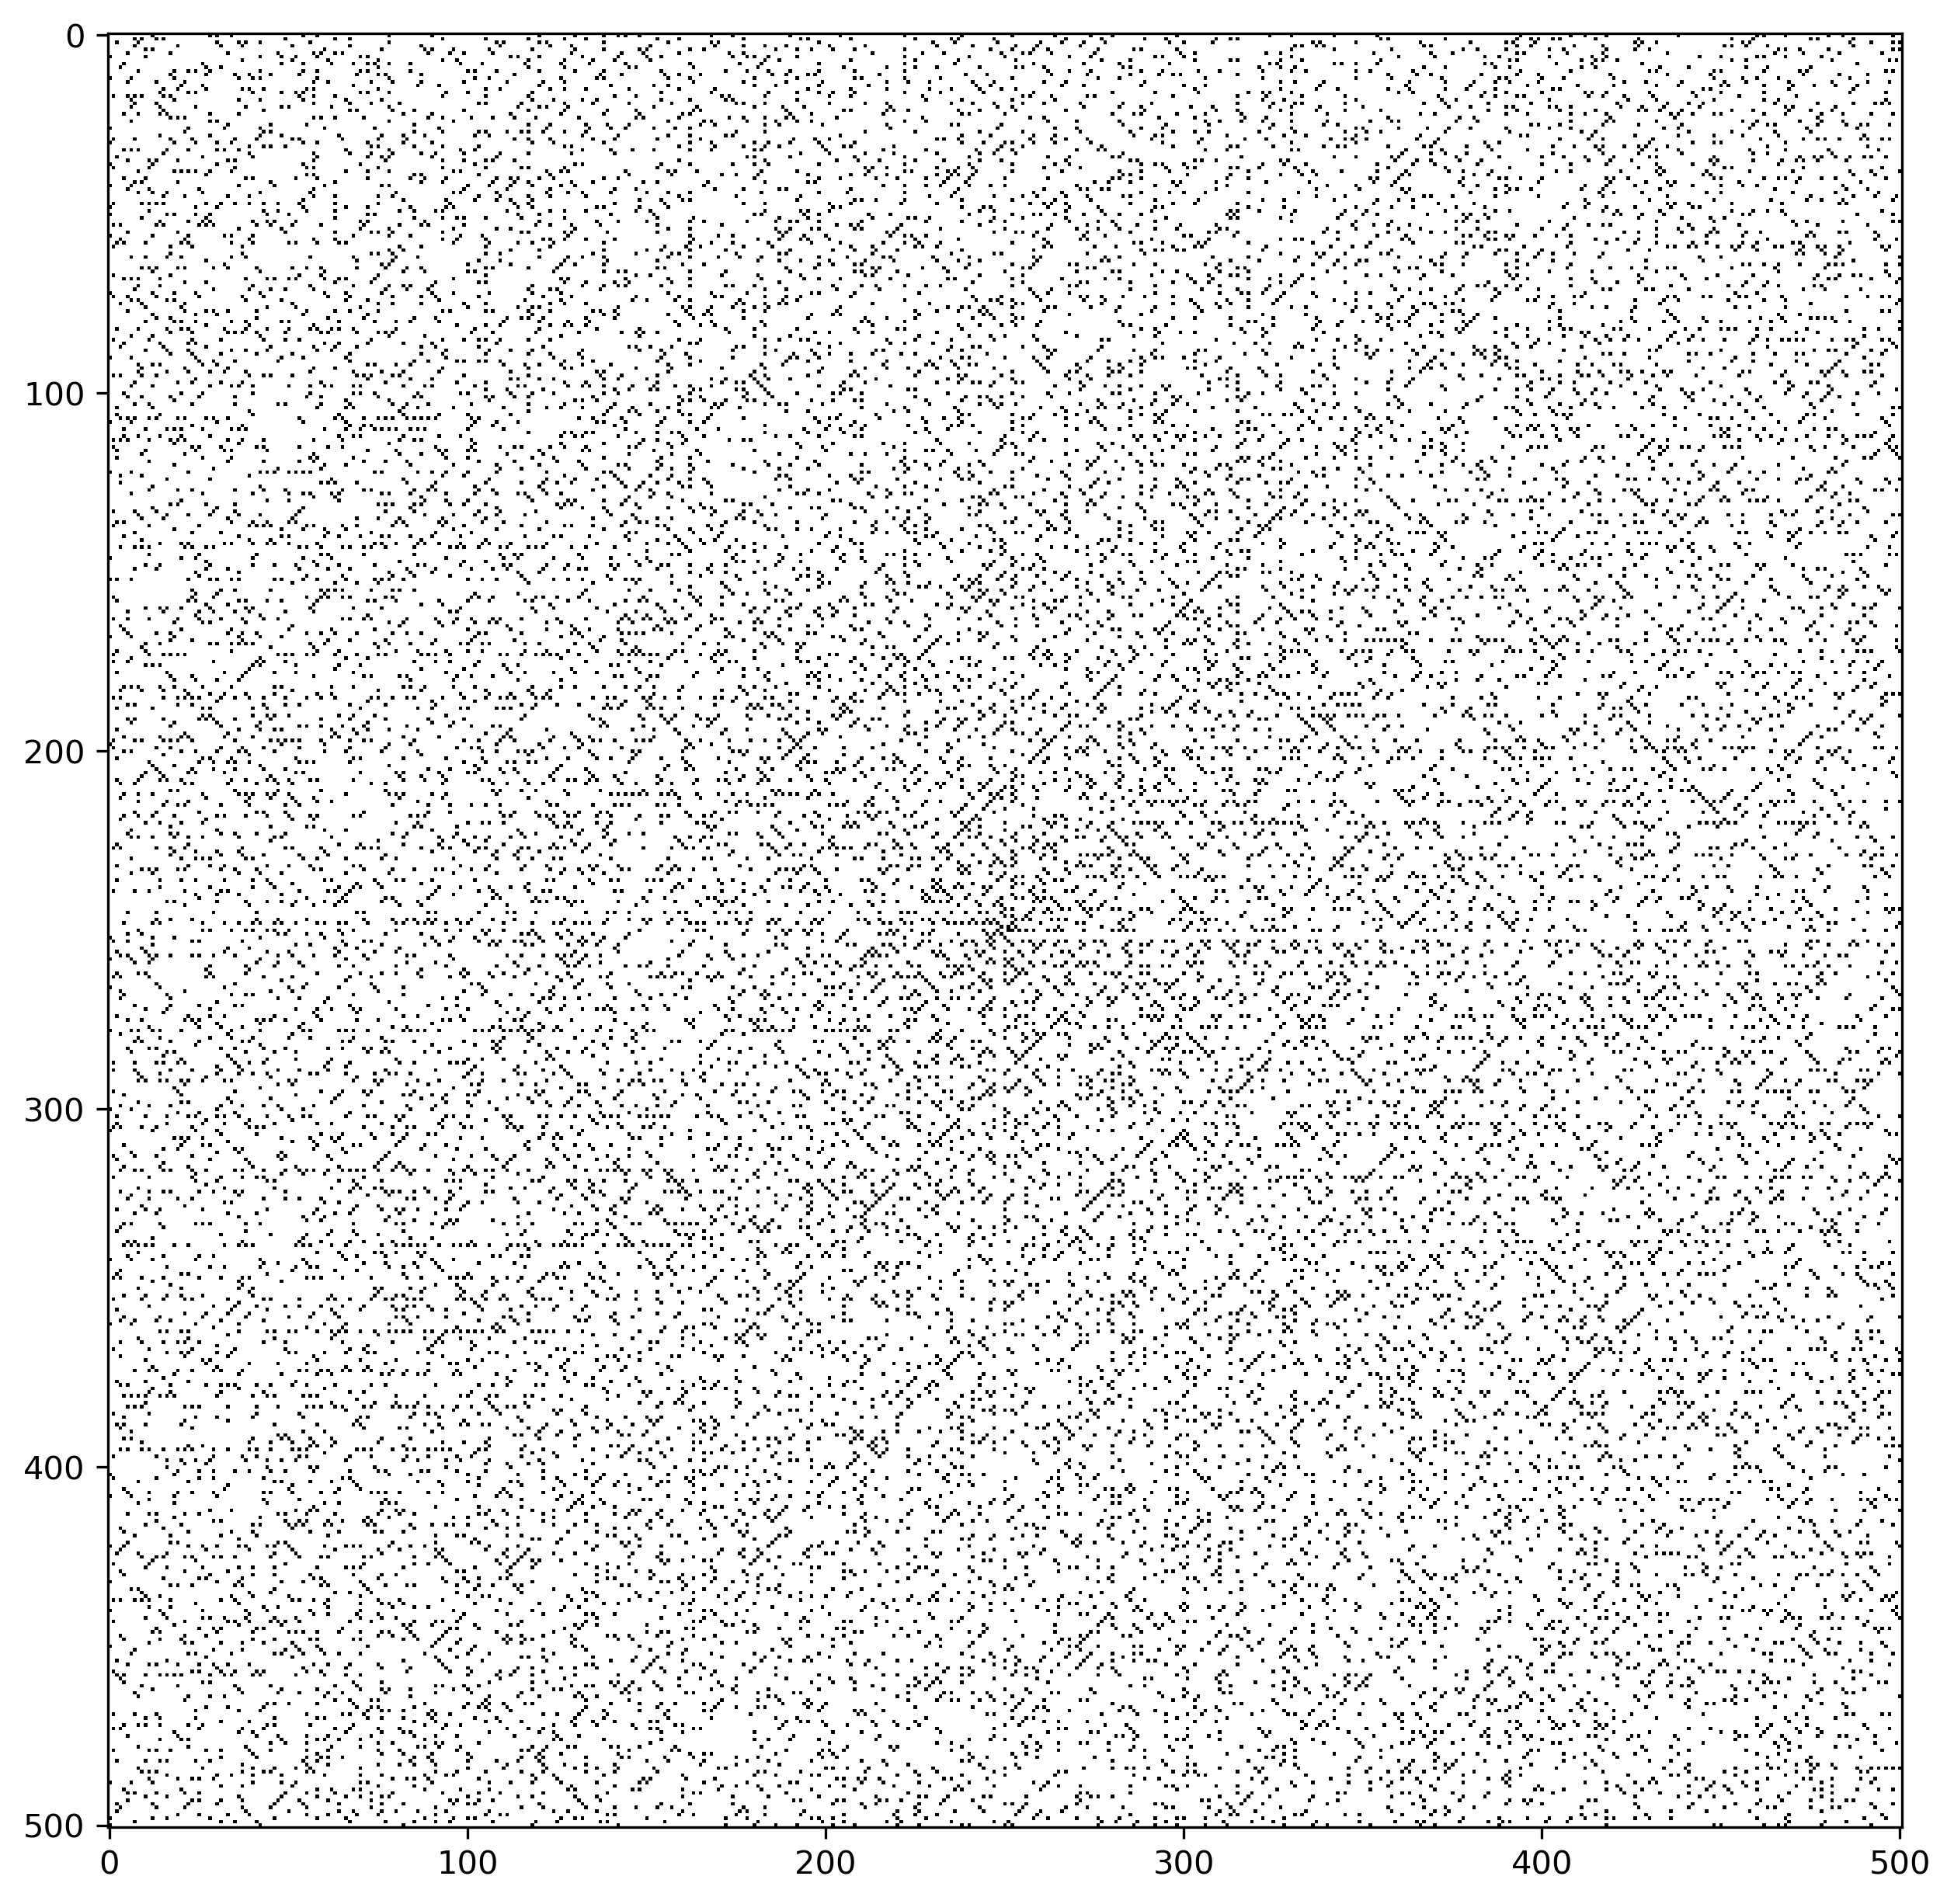

In [18]:
plt.figure(figsize=(10, 10), dpi=300)
plt.imshow(integer_spiral_numpy(501)>0, cmap=plt.cm.gray_r)
